In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from matplotlib import pyplot as plt
df = pd.read_csv('MobileData.csv',usecols=['Name','ProcessUnit','Ram','Primary Camera','Secondray Camera','Design','Display','price'])
df ['Average'] = df.drop('price',axis=1).mean(axis=1)
df['UserDemand'] = ['70%' if row['price']>20000 and row['price']<=25000 and row['Average']>=3.5 else '50%' if row['price']>20000 and row['price']<=25000 and row['Average']>=3.0 and row['Average']<3.5 or row['price']>15000 and row['price']<=20000 and row['Average']>=3.0 and row['Average']<3.5 else '60%' if row['price']>25000 and row['price']<=30000 and row['Average']>=3.8 or row['price']>30000 and row['price']<=35000 and row['Average']>=3.8 else '40%' if row['price']>35000 and row['price']<=40000 and row['Average']>=4  or row['price']>25000 and row['price']<=30000 and row['Average']>=3.0 and row['Average']<3.5 or row['price']>40000 and row['Average']>=4.0 else '20%' if row['price']>40000 and row['Average']>=3.0 and row['Average']<3.5 else '30%' for index,row in df.iterrows()]
df['Prediction'] = ['lot Profit' if row['UserDemand'] == '70%' or row['UserDemand'] == '60%' else 'Medium Profit' if row['UserDemand'] == '40%' or row['UserDemand'] == '50%' else 'Low Profit' for index,row  in df.iterrows()]
label_quality = LabelEncoder()
df['Prediction'] = label_quality.fit_transform(df['Prediction'])
df['UserDemand'] = label_quality.fit_transform(df['UserDemand'])
X = df.drop(['Prediction','Name','ProcessUnit','Ram','Primary Camera','Secondray Camera','Design','Display'],axis=1)
y = df['Prediction']


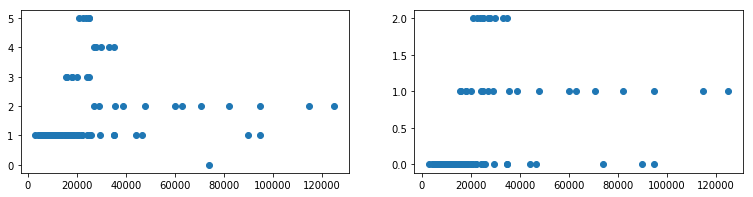

In [2]:
plt.figure(1, figsize=(20, 3))
plt.subplot(131)
plt.scatter(X['price'],X['UserDemand'])
plt.subplot(132)
plt.scatter(X['price'],y)

In [3]:
clf = SVC(gamma='auto')
clf.fit(X,y)
clf.predict([[25000,4,5]])

array([0])

In [4]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
knn.predict([[25000,3.5,3]])

array([2])